In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

results = pd.read_csv('results.csv')
results.head()

,Unnamed: 0,index,f1,precision,recall,full_path,curve
0,0,mean,0.782470,0.782000,0.784092,./output/raw/depth_5/large_glushkova_eng/dict....,"[0.0, 0.7703984819734345, 0.959203036053131, 0..."
1,1,mean,0.772894,0.772429,0.774619,./output/raw/depth_5/small_glushkova_eng/dict....,"[0.0, 0.7552380952380953, 0.9447619047619048, ..."
2,2,mean,0.783497,0.782895,0.785492,./output/raw/depth_5/small_glushkova_eng/reran...,"[0.0, 0.7638095238095238, 0.9495238095238095, ..."
3,3,mean,0.875890,0.873924,0.879325,./output/raw/depth_5/medium_test_boun/dict.json,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."
4,4,mean,0.878145,0.876863,0.880494,./output/raw/depth_5/medium_test_boun/reranked...,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."


ValueError: arange: cannot compute length

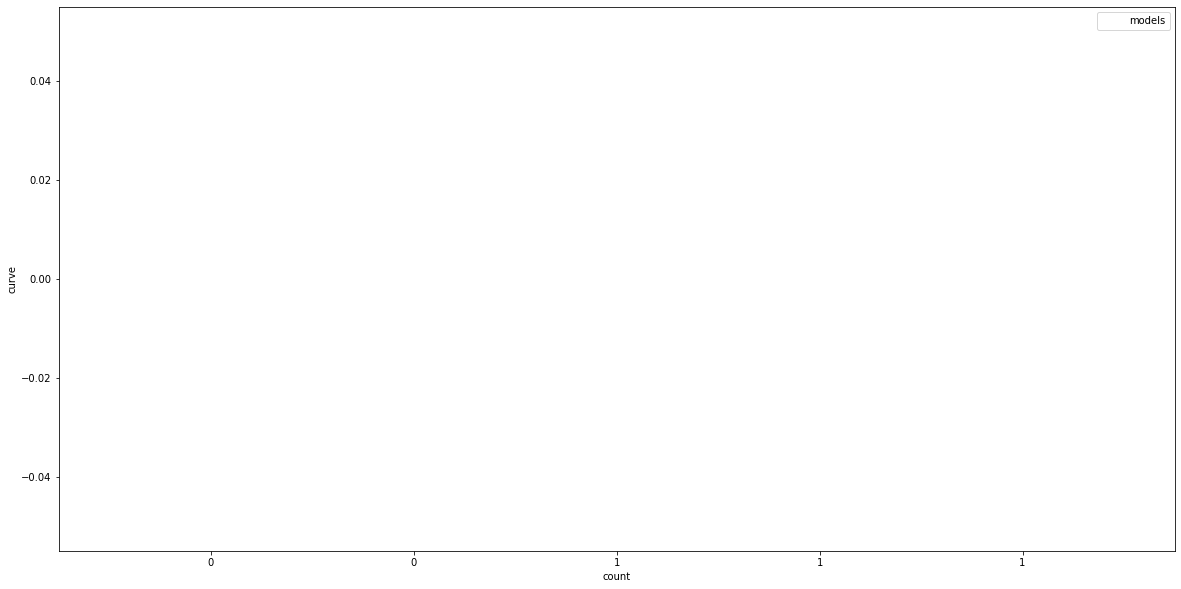

In [31]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_rus')]
df = df[df['full_path'].str.contains('translation')]
import ast
import matplotlib.pyplot as plt

df = df[df['full_path'].str.contains('13')]

df['curve'] = df['curve'].apply((ast.literal_eval))

df['curve'] = df['curve'].apply(lambda x: x[0:2])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()

df['curve'] = df['curve'].astype(float)

def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.9811, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

In [30]:
df['curve'] = df['curve'].round(3)
df

,models,curve,count
90,gpt2 (117M),0.000,0
90,gpt2 (117M),0.631,1
93,gpt2-large (774M),0.000,0
93,gpt2-large (774M),0.722,1
94,gpt2-medium (345M),0.000,0
94,gpt2-medium (345M),0.683,1
97,gpt2 (117M),0.000,0
97,gpt2 (117M),0.573,1


[None, None]

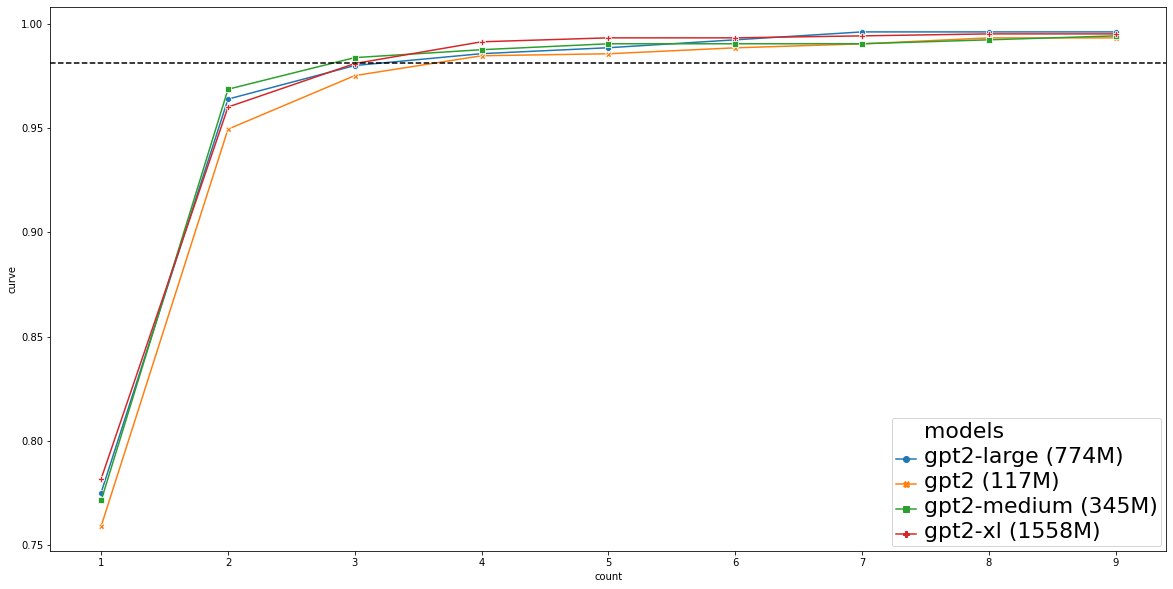

In [4]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_eng')]
import ast
import matplotlib.pyplot as plt

df = df[df['full_path'].str.contains('13')]

df['curve'] = df['curve'].apply((ast.literal_eval))

df['curve'] = df['curve'].apply(lambda x: x[1:10])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()

df['curve'] = df['curve'].astype(float)

def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.9811, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

In [5]:
df

,models,curve,count
18,gpt2-large (774M),0.775142,0
18,gpt2-large (774M),0.963947,1
18,gpt2-large (774M),0.980076,2
18,gpt2-large (774M),0.985769,3
18,gpt2-large (774M),0.988615,4
18,gpt2-large (774M),0.992410,5
18,gpt2-large (774M),0.996205,6
18,gpt2-large (774M),0.996205,7
18,gpt2-large (774M),0.996205,8
19,gpt2 (117M),0.759048,0


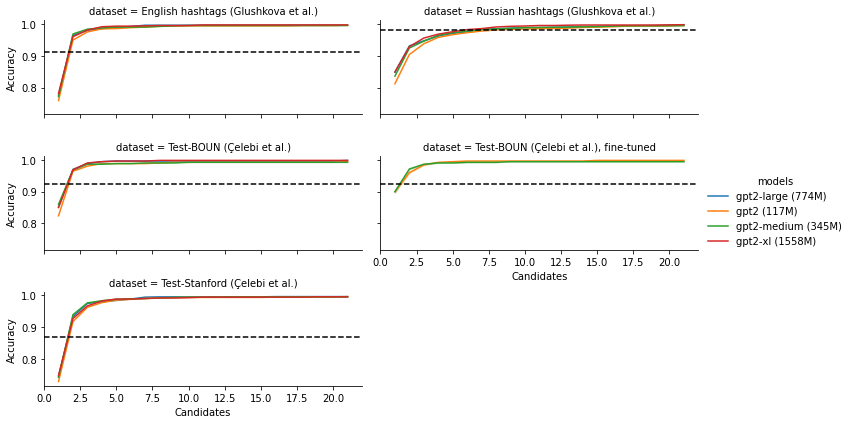

In [31]:
import ast
import matplotlib.pyplot as plt

#glushkova_eng

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 1.7,8.27

max_len_candidates = 22

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_eng')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

glushkova_eng = df.copy()
glushkova_eng['dataset'] = 'glushkova_eng'

#glushkova_rus

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_rus')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

glushkova_rus = df.copy()
glushkova_rus['dataset'] = 'glushkova_rus'

#boun

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('boun')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

boun = df.copy()
boun['dataset'] = 'boun'

# fine-boun

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('boun')]
df = df[~df['full_path'].str.contains('translation')]
# df = df[df['full_path'].str.contains('finetuning')]
df = df[df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df = df[~df['full_path'].str.contains('xl')]
df = df[~df['full_path'].str.contains('large')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

fine_boun = df.copy()
fine_boun['dataset'] = 'fine'


#stanford

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('stanford')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

stanford = df.copy()
stanford['dataset'] = 'stanford'

df = pd.concat([glushkova_eng, glushkova_rus, boun, fine_boun, stanford])


def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

def rename_dataset(path):
    replace_dict = {
        "glushkova_rus": "Russian hashtags (Glushkova et al.)",
        "glushkova_eng": "English hashtags (Glushkova et al.)",
        "boun": "Test-BOUN (Çelebi et al.)",
        "fine": "Test-BOUN (Çelebi et al.), fine-tuned",
        "stanford": "Test-Stanford (Çelebi et al.)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]    
        
df['full_path'] = df['full_path'].apply(rename_full_path)
df['dataset'] = df['dataset'].apply(rename_dataset)

df = df.rename(columns={
    "full_path": "models",
    "curve": "Accuracy",
    "count": "Candidates"
})


# mask = ((df['models'] == "gpt2-medium (345M)") | (df['models'] == "gpt2-xl (1558M)"))
# df = df[mask]

g = sns.FacetGrid(df, hue="models", col="dataset", height=2, col_wrap=2, aspect=2.5, legend_out=True)
g = (g.map(sns.lineplot, 'Candidates', 'Accuracy', dashes=False, markers=True).add_legend())

# g = (g.map(sns.lineplot, 'Candidates', 'Accuracy', dashes=False, markers=True).add_legend())

# g = sns.catplot(x="Candidates", y="Accuracy", hue="models", col="dataset", data=df, kind="bar")


glushkova_eng_ax, glushkova_rus_ax, boun_ax, fine_ax, stanford_ax = g.axes
glushkova_eng_ax.axhline(0.9134, ls='--', c='black')
glushkova_rus_ax.axhline(0.9811, ls='--', c='black')
boun_ax.axhline(0.924, ls='--', c='black')
fine_ax.axhline(0.924, ls='--', c='black')
stanford_ax.axhline(0.87, ls='--', c='black')

# g.fig.set_figheight(20)
# g.fig.set_figwidth(20)

# from  matplotlib.ticker import FuncFormatter


# from matplotlib.ticker import MaxNLocator

# for ax in g.axes.flatten():
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.set_title(ax.get_title().split('=')[1], size=20) 
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.set_xlabel(ax.get_xlabel(), size=20)
#     ax.set_ylabel(ax.get_ylabel(), size=20)

# plt.setp(g._legend.get_texts(), fontsize=20)
# plt.setp(g._legend.get_title(), fontsize=20)

In [58]:
tmp = df[df['Candidates']==2]
tmp = tmp[tmp['dataset'].str.contains('BOUN')]
tmp['Accuracy'] = tmp['Accuracy'].round(3)
tmp

,models,Accuracy,Candidates,dataset
20,gpt2-medium (345M),0.968,2,Test-BOUN (Çelebi et al.)
21,gpt2 (117M),0.964,2,Test-BOUN (Çelebi et al.)
23,gpt2-large (774M),0.970,2,Test-BOUN (Çelebi et al.)
48,gpt2-xl (1558M),0.968,2,Test-BOUN (Çelebi et al.)
30,gpt2-medium (345M),0.972,2,"Test-BOUN (Çelebi et al.), fine-tuned"
31,gpt2-medium (345M),0.970,2,"Test-BOUN (Çelebi et al.), fine-tuned"
32,gpt2 (117M),0.962,2,"Test-BOUN (Çelebi et al.), fine-tuned"
33,gpt2 (117M),0.958,2,"Test-BOUN (Çelebi et al.), fine-tuned"


In [8]:
import string 
non_numeric_chars = ''.join(set(string.printable) - set(string.digits))
replace_tuples = ( (x,"") for x in non_numeric_chars )

def replace(item, lst):
    for tup in lst:
        item = item.replace(*tup)
    return item
        

df['Accuracy'] = df['Accuracy'].apply(lambda x: round(x, 3))
df['models'] = df['models'].apply(lambda x: "".join([y for y in x if y in string.digits]) )
df['models'] = df['models'].astype(int)
df.sort_values(by=['dataset', 'models']).to_csv('graph.csv')
df

,models,Accuracy,Candidates,dataset
18,2774,0.775,1,English hashtags (Glushkova et al.)
18,2774,0.964,2,English hashtags (Glushkova et al.)
18,2774,0.980,3,English hashtags (Glushkova et al.)
18,2774,0.986,4,English hashtags (Glushkova et al.)
18,2774,0.989,5,English hashtags (Glushkova et al.)
...,...,...,...,...
49,21558,0.989,6,Test-Stanford (Çelebi et al.)
49,21558,0.991,7,Test-Stanford (Çelebi et al.)
49,21558,0.992,8,Test-Stanford (Çelebi et al.)
49,21558,0.992,9,Test-Stanford (Çelebi et al.)


In [9]:
df[df['dataset'].str.contains('Russian')].sort_values(['models', 'Candidates'])

,models,Accuracy,Candidates,dataset
26,2117,0.812,1,Russian hashtags (Glushkova et al.)
26,2117,0.904,2,Russian hashtags (Glushkova et al.)
26,2117,0.938,3,Russian hashtags (Glushkova et al.)
26,2117,0.958,4,Russian hashtags (Glushkova et al.)
26,2117,0.967,5,Russian hashtags (Glushkova et al.)
26,2117,0.973,6,Russian hashtags (Glushkova et al.)
26,2117,0.978,7,Russian hashtags (Glushkova et al.)
26,2117,0.982,8,Russian hashtags (Glushkova et al.)
26,2117,0.983,9,Russian hashtags (Glushkova et al.)
26,2117,0.984,10,Russian hashtags (Glushkova et al.)


[None, None]

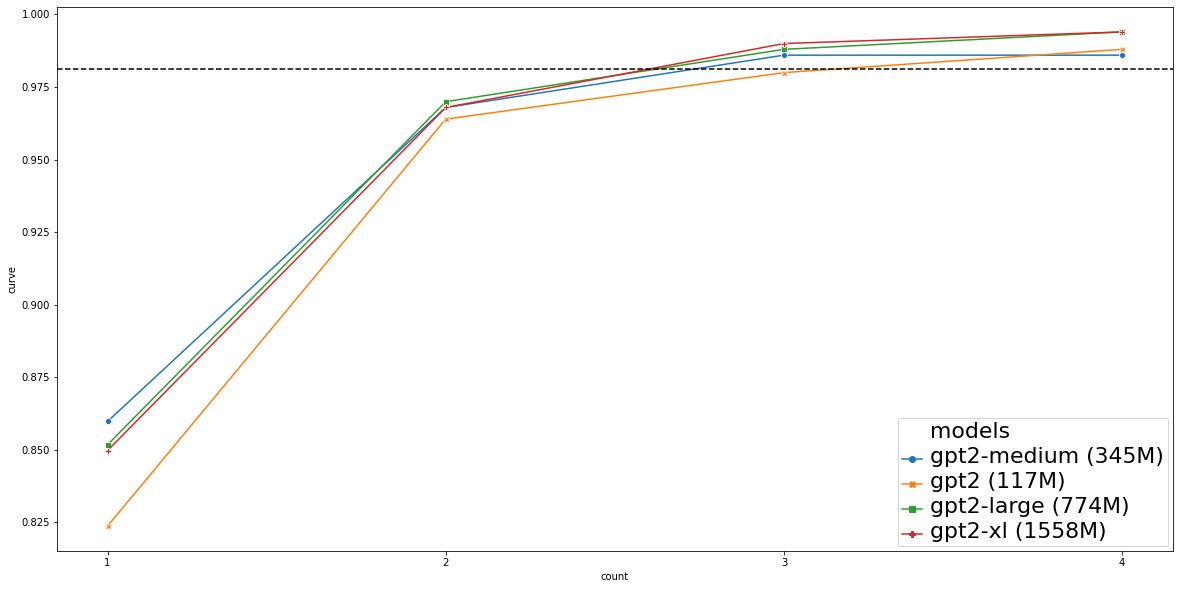

In [10]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('boun')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:5])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['curve'] = df['curve'].astype(float)

boun_df = df



def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.9811, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

[None, None]

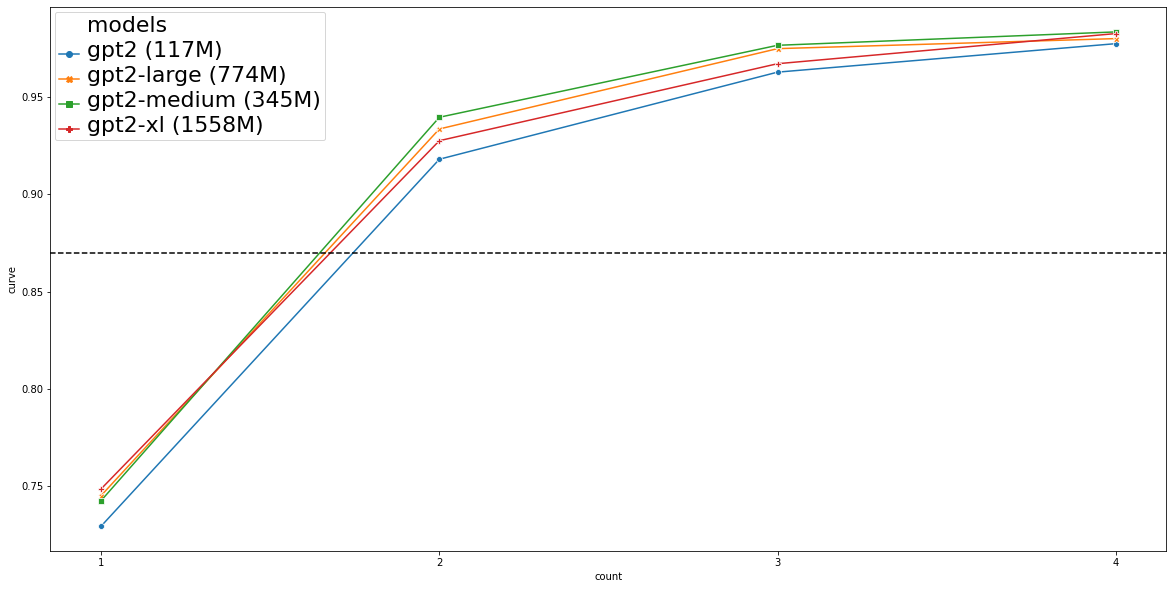

In [11]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('stanford')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:5])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['curve'] = df['curve'].astype(float)

def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.87, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

In [12]:
def parse_benchmarks(lst):
    new_lst = []
    for item in lst:
        new_lst.append(item.split(' ')[-1])
    return new_lst

df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('wiki')]
df['speed'] = 23919.0 / df['speed'].astype(float)
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['average_line_size'] = 13
df

,Unnamed: 0,filename,speed,len,count,average_line_size
5,5,gpt2_small&topk_1&steps_8&wiki.log,46.771824,11,0,13


In [13]:
df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('tweets')]
df['speed'] = 35350.0 / df['speed'].astype(float)
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['average_line_size'] = 40
df

,Unnamed: 0,filename,speed,len,count,average_line_size
59,59,gpt2_small&topk_1&steps_8&tweets.log,21.618118,11,7,40


In [14]:
df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('de_news')]
df = df[df['filename'].str.contains('16')]
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['speed'] = 130847.0 / df['speed'].astype(float)
df['average_line_size'] = 70
df

,Unnamed: 0,filename,speed,len,count,average_line_size
216,216,gpt2_large&topk_1&steps_16&de_news.log,2.661924,3,0,70
197,197,gpt2_medium&topk_1&steps_16&de_news.log,3.819895,5,0,70
208,208,gpt2_small&topk_1&steps_16&de_news.log,5.980393,11,1,70


In [15]:
df = pd.read_csv('count.csv')
df['lines'] = df['lines'].apply(ast.literal_eval)
df['lines'] = df['lines'].apply(lambda x: [y for y in x if int(y) > 1])

allowed = [
    "de_news.tsv",
    "tweets.tsv",
    "wiki.tsv"
]

allowed = pd.DataFrame(allowed)

df = pd.merge(allowed, df, left_on=0, right_on='filename', how='inner')

df = df[['filename', 'lines']]
df = df.explode('lines')
df['lines'] = df['lines'].astype(int)
df['count'] = df.groupby('filename').cumcount()
df

,filename,lines,count
0,de_news.tsv,99,0
0,de_news.tsv,106,1
0,de_news.tsv,169,2
0,de_news.tsv,70,3
0,de_news.tsv,266,4
...,...,...,...
2,wiki.tsv,25,995
2,wiki.tsv,26,996
2,wiki.tsv,26,997
2,wiki.tsv,24,998


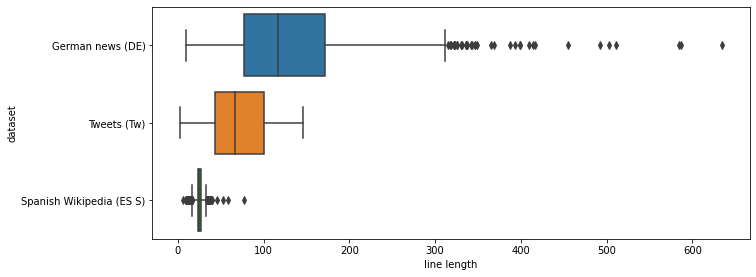

In [16]:
rcParams['figure.figsize'] = 10.7,4.27

def rename_rows(record):
    dictionary = {
        "de_news.tsv": "German news (DE)",
        "tweets.tsv": "Tweets (Tw)",
        "wiki.tsv": "Spanish Wikipedia (ES S)"
    }
    return dictionary[record]

df['filename'] = df['filename'].apply(rename_rows)

plot = df.rename(columns={
    "filename": "dataset",
    "lines": "line length"
})

sns.boxplot(y='dataset', x='line length', data=plot)


In [17]:
from scipy.stats import iqr
df = df[['filename', 'lines']]

q1 = lambda x: np.percentile(x, 25, interpolation = 'midpoint') 
q3 = lambda x: np.percentile(x, 75, interpolation = 'midpoint')  

df.groupby('filename').agg([np.mean, np.std, np.max, np.min, np.median, q1, q3])

lines                                         \
                                mean        std amax amin median <lambda_0>   
filename                                                                      
German news (DE)          132.464000  81.449412  635    9  117.0         77   
Spanish Wikipedia (ES S)   24.813000   4.845566   77    6   24.5         23   
Tweets (Tw)                71.845382  34.328074  146    2   67.0         43   

                                     
                         <lambda_1>  
filename                             
German news (DE)                171  
Spanish Wikipedia (ES S)         27  
Tweets (Tw)                     100